In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

Blank Image


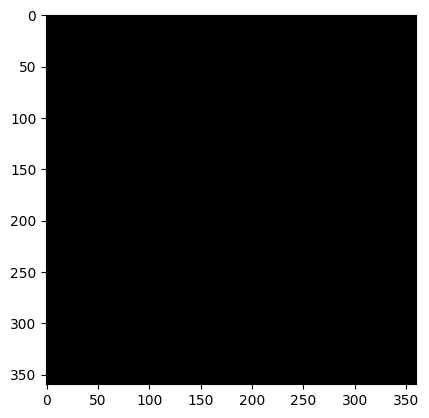

In [2]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

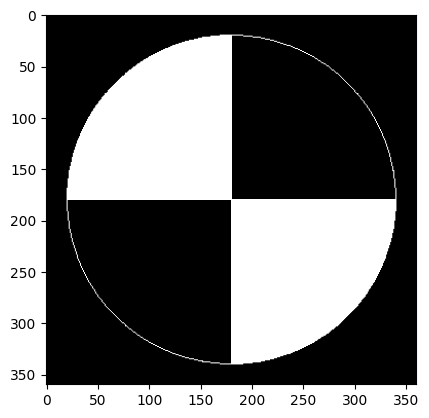

In [3]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

original_image = image

Original image variances for all 3 x 3 regions

Region with focal radius : 10




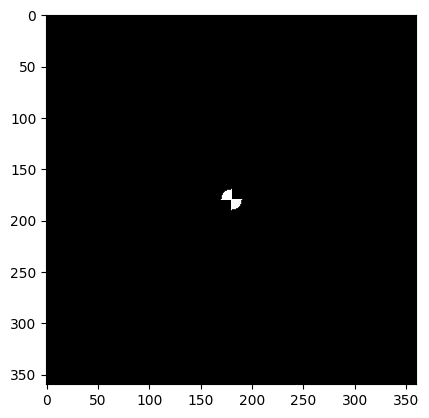

image with focal point at center initially


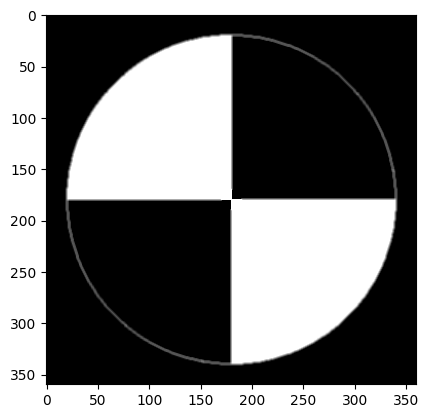

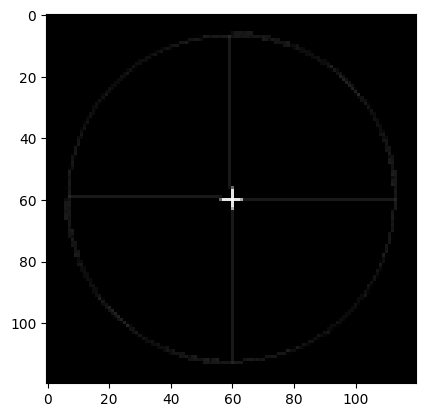

In [4]:
blurred_image = cv2.GaussianBlur(image, (3, 3), 10)
fr = 10
mask = np.zeros(IMG_DIMS, dtype=np.uint8)
non_blurred_region = cv2.circle(mask, CENTER, 10, (255, 255, 255), -1)
non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
print('Region with focal radius : ' + str(fr) + '\n\n')
plt.imshow(non_blurred_region, cmap='gray')
plt.show()

blurred_image_copy = blurred_image.copy()
blurred_image_copy = cv2.circle(blurred_image_copy, CENTER, 10, (0, 0, 0), -1)
image = blurred_image_copy +  non_blurred_region

print('image with focal point at center initially')
plt.imshow(image, cmap='gray')
plt.show()

laplacian_filter_8 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_mask = cv2.filter2D(image, -1, laplacian_filter_8)

variances = []
for x in range(0, IMG_DIMS[0]//3):
    for y in range(0, IMG_DIMS[1]//3):
        i = x * 3
        j = y * 3
        variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
        edge_mask[i+1,j+2]
        ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

variance_image = np.array(variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)
plt.imshow(abs(variance_image), cmap='gray')

Logic # 1 -> Brute force
Locate all regions in some neighbourhood of 3x3 where the variance varies is extremely high, and then merge these together. For now, there will only be a single such region (if they are multiple, choose the region with highest such effect). Then, find the distance between the two farthest pixels (taking n8 connectivity).
This distance will be th e

Region with focal radius : 10




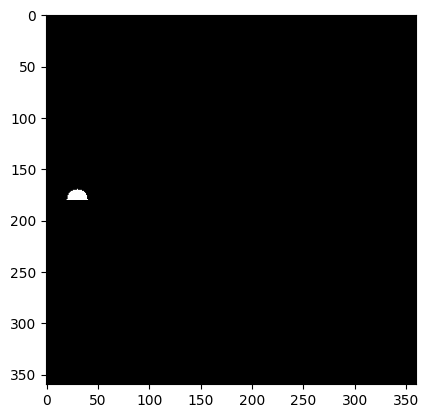

Test image with radius  10  being sharp with rest as blurred


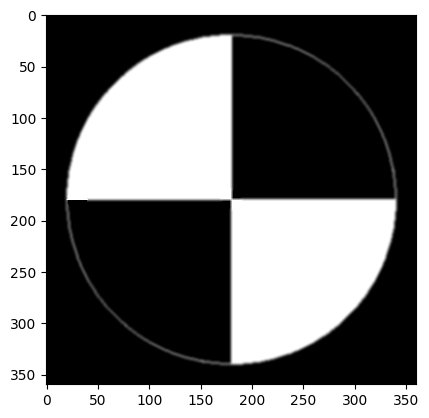

difference in test image and filtered non blurred region (in circular fasion)


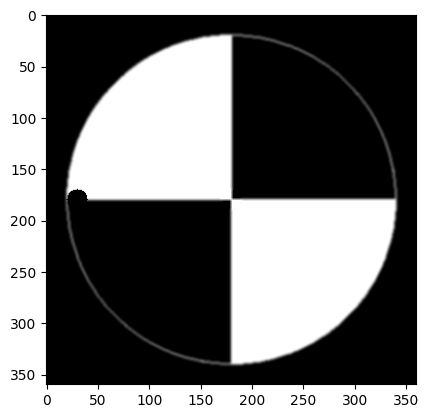

Visualization of separation of non blurred and blurred parts (radius = fr)


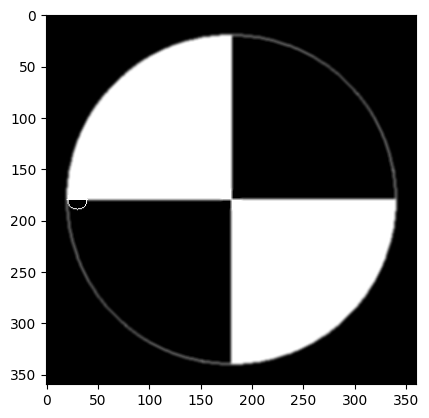

Laplacian Edge Mask


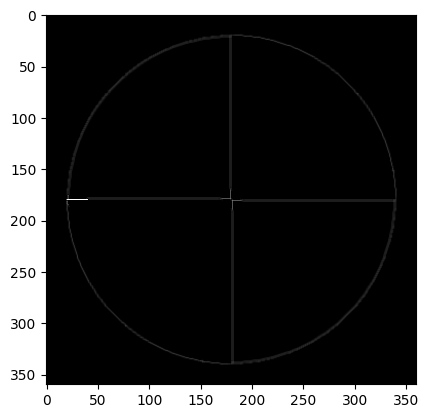

L O G edge mask


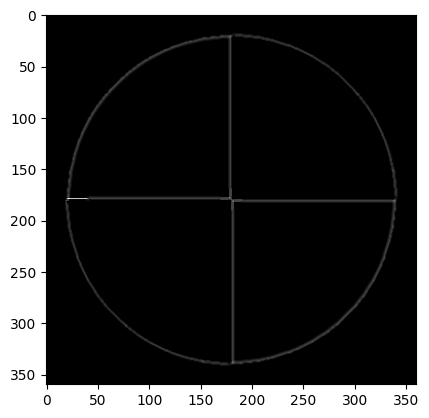

Variance mask : 


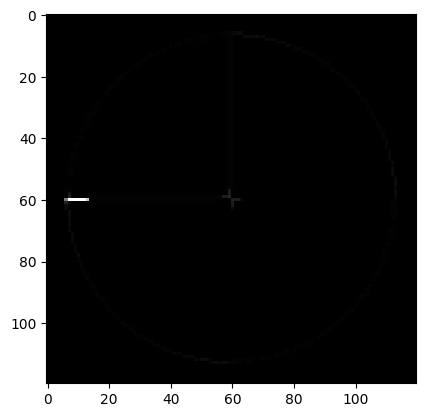

difference in variance maps


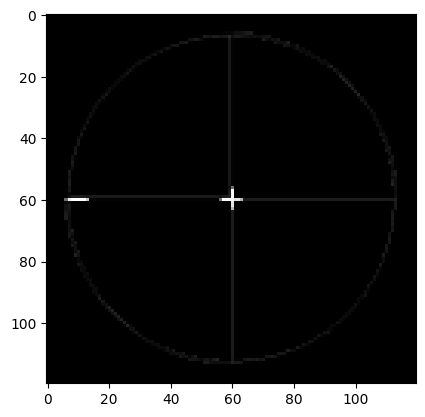

[[[ 60   6]]

 [[ 59   7]]

 [[ 51   7]]

 [[ 50   8]]

 [[ 46   8]]

 [[ 45   9]]

 [[ 43   9]]

 [[ 42  10]]

 [[ 40  10]]

 [[ 39  11]]

 [[ 37  11]]

 [[ 36  12]]

 [[ 35  12]]

 [[ 33  14]]

 [[ 32  14]]

 [[ 31  15]]

 [[ 30  15]]

 [[ 27  18]]

 [[ 26  18]]

 [[ 18  26]]

 [[ 18  27]]

 [[ 15  30]]

 [[ 15  31]]

 [[ 14  32]]

 [[ 14  33]]

 [[ 12  35]]

 [[ 12  36]]

 [[ 11  37]]

 [[ 11  39]]

 [[ 10  40]]

 [[ 10  42]]

 [[  9  43]]

 [[  9  45]]

 [[  8  46]]

 [[  8  50]]

 [[  7  51]]

 [[  7  59]]

 [[  6  60]]

 [[  6  66]]

 [[  7  67]]

 [[  7  72]]

 [[  8  73]]

 [[  8  75]]

 [[  9  76]]

 [[  9  78]]

 [[ 10  79]]

 [[ 10  81]]

 [[ 11  82]]

 [[ 11  83]]

 [[ 12  84]]

 [[ 12  85]]

 [[ 14  87]]

 [[ 14  88]]

 [[ 15  89]]

 [[ 15  90]]

 [[ 18  93]]

 [[ 18  94]]

 [[ 23  99]]

 [[ 24  99]]

 [[ 28 103]]

 [[ 29 103]]

 [[ 32 106]]

 [[ 33 106]]

 [[ 34 107]]

 [[ 35 107]]

 [[ 36 108]]

 [[ 37 108]]

 [[ 38 109]]

 [[ 39 109]]

 [[ 40 110]]

 [[ 42 110]]

 [[ 43

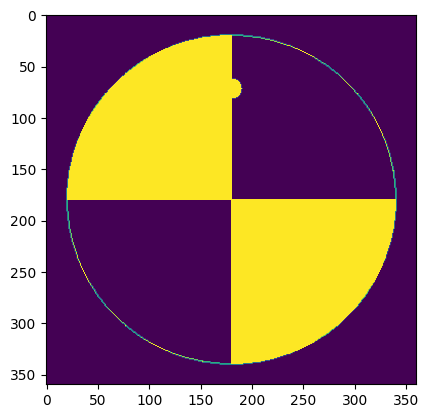

Predicted translation of focal point :  0 -108
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  246.07315985291854
Angle :  -0.7853981633974484
[[[ 60  61]]

 [[ 61  60]]

 [[112  60]]

 [[113  61]]

 [[113  63]]

 [[112  64]]

 [[112  70]]

 [[111  71]]

 [[111  74]]

 [[110  75]]

 [[110  77]]

 [[109  78]]

 [[109  80]]

 [[108  81]]

 [[108  82]]

 [[107  83]]

 [[107  84]]

 [[106  85]]

 [[106  86]]

 [[104  88]]

 [[104  89]]

 [[101  92]]

 [[101  93]]

 [[ 93 101]]

 [[ 92 101]]

 [[ 89 104]]

 [[ 88 104]]

 [[ 86 106]]

 [[ 85 106]]

 [[ 84 107]]

 [[ 83 107]]

 [[ 82 108]]

 [[ 81 108]]

 [[ 80 109]]

 [[ 78 109]]

 [[ 77 110]]

 [[ 75 110]]

 [[ 74 111]]

 [[ 71 111]]

 [[ 70 112]]

 [[ 64 112]]

 [[ 63 113]]

 [[ 61 113]]

 [[ 60 112]]]
(261, 207)  are the new centers 
predicted center of the new focal length is highlighed in red


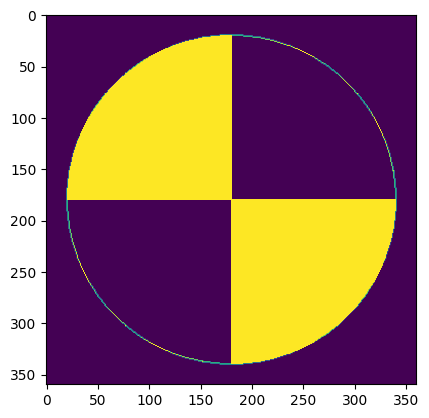

Predicted translation of focal point :  81 27
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  169.7056274847714
Angle :  -0.7853981633974482
[[[ 13  60]]

 [[ 14  59]]

 [[ 55  59]]

 [[ 56  60]]

 [[ 59  60]]

 [[ 60  61]]

 [[ 60 112]]

 [[ 59 113]]

 [[ 56 113]]

 [[ 55 112]]

 [[ 49 112]]

 [[ 48 111]]

 [[ 45 111]]

 [[ 44 110]]

 [[ 42 110]]

 [[ 41 109]]

 [[ 40 109]]

 [[ 39 108]]

 [[ 37 108]]

 [[ 36 107]]

 [[ 35 107]]

 [[ 34 106]]

 [[ 33 106]]

 [[ 32 105]]

 [[ 31 105]]

 [[ 26 100]]

 [[ 25 100]]

 [[ 17  92]]

 [[ 17  91]]

 [[ 16  90]]

 [[ 16  89]]

 [[ 14  87]]

 [[ 14  86]]

 [[ 13  85]]

 [[ 13  84]]

 [[ 12  83]]

 [[ 12  82]]

 [[ 11  81]]

 [[ 11  80]]

 [[ 10  79]]

 [[ 10  77]]

 [[  9  76]]

 [[  9  74]]

 [[  8  73]]

 [[  8  70]]

 [[  7  69]]

 [[  7  61]]

 [[  8  60]]]
(102, 204)  are the new centers 
predicted center of the new focal length is highlighed in red


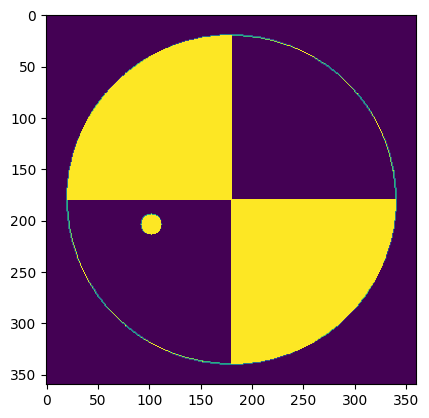

Predicted translation of focal point :  -78 24
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  211.11608181282637
Angle :  -0.6103379162907197
[[[ 59   8]]

 [[ 60   7]]

 [[ 69   7]]

 [[ 70   8]]

 [[ 73   8]]

 [[ 74   9]]

 [[ 76   9]]

 [[ 77  10]]

 [[ 79  10]]

 [[ 80  11]]

 [[ 81  11]]

 [[ 82  12]]

 [[ 83  12]]

 [[ 84  13]]

 [[ 85  13]]

 [[ 86  14]]

 [[ 87  14]]

 [[ 89  16]]

 [[ 90  16]]

 [[ 91  17]]

 [[ 92  17]]

 [[100  25]]

 [[100  26]]

 [[105  31]]

 [[105  32]]

 [[106  33]]

 [[106  34]]

 [[107  35]]

 [[107  36]]

 [[108  37]]

 [[108  39]]

 [[109  40]]

 [[109  41]]

 [[110  42]]

 [[110  44]]

 [[111  45]]

 [[111  48]]

 [[112  49]]

 [[112  55]]

 [[113  56]]

 [[113  59]]

 [[112  60]]

 [[ 61  60]]

 [[ 60  59]]

 [[ 60  56]]

 [[ 59  55]]]
(259, 48)  are the new centers 
predicted center of the new focal length is highlighed in red


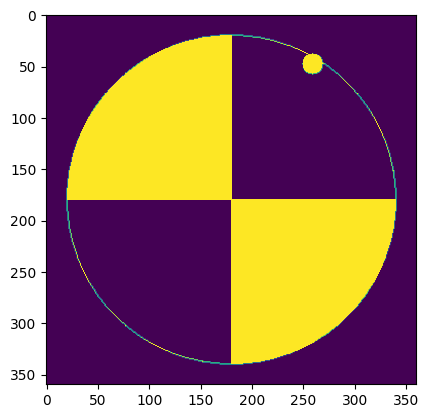

Predicted translation of focal point :  79 -132
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  211.11608181282637
Angle :  -0.9604584105041771
[[[50  8]]

 [[51  7]]

 [[58  7]]

 [[59  8]]

 [[59 58]]

 [[58 59]]

 [[ 8 59]]

 [[ 7 58]]

 [[ 7 51]]

 [[ 8 50]]

 [[ 8 46]]

 [[ 9 45]]

 [[ 9 43]]

 [[10 42]]

 [[10 41]]

 [[11 40]]

 [[11 38]]

 [[12 37]]

 [[12 36]]

 [[13 35]]

 [[13 34]]

 [[15 32]]

 [[15 31]]

 [[16 30]]

 [[16 29]]

 [[29 16]]

 [[30 16]]

 [[31 15]]

 [[32 15]]

 [[34 13]]

 [[35 13]]

 [[36 12]]

 [[37 12]]

 [[38 11]]

 [[40 11]]

 [[41 10]]

 [[42 10]]

 [[43  9]]

 [[45  9]]

 [[46  8]]]
(100, 47)  are the new centers 
predicted center of the new focal length is highlighed in red


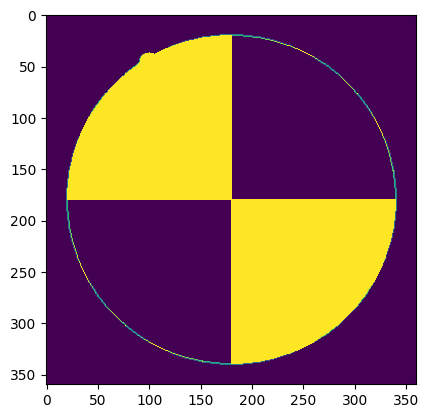

Predicted translation of focal point :  -80 -133
Actual translation :  -150
Correction parameters
Angle of rotation : 
Radius :  244.65894629054543
Angle :  -0.7853981633974484
Region with focal radius : 10




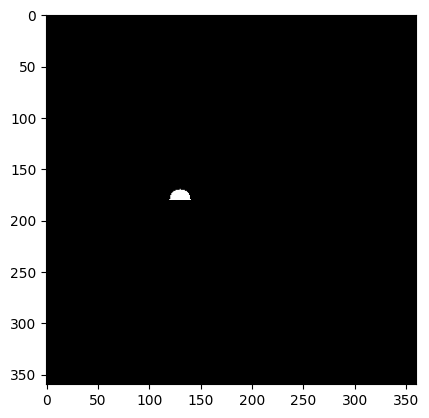

Test image with radius  10  being sharp with rest as blurred


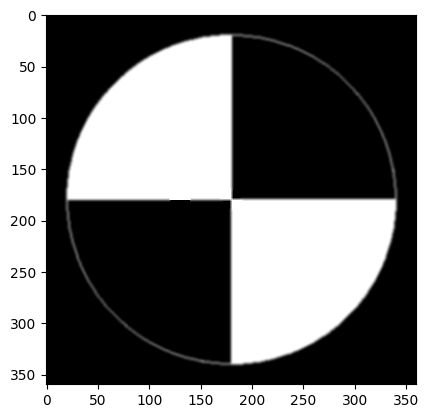

difference in test image and filtered non blurred region (in circular fasion)


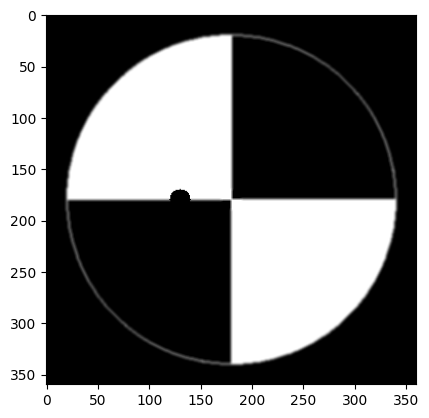

Visualization of separation of non blurred and blurred parts (radius = fr)


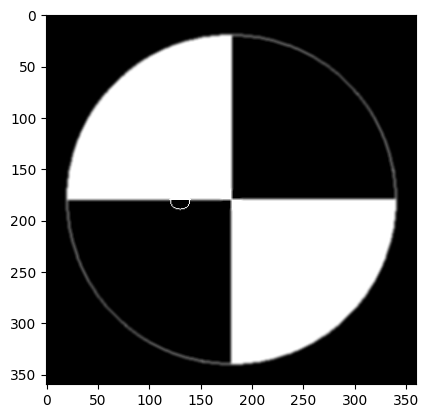

Laplacian Edge Mask


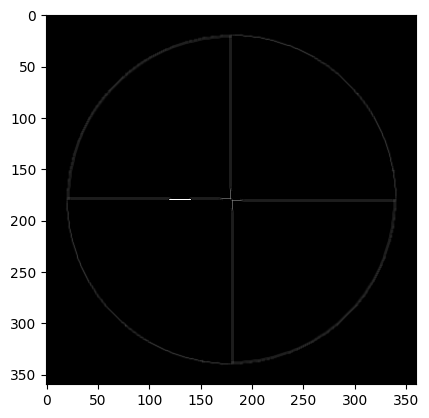

L O G edge mask


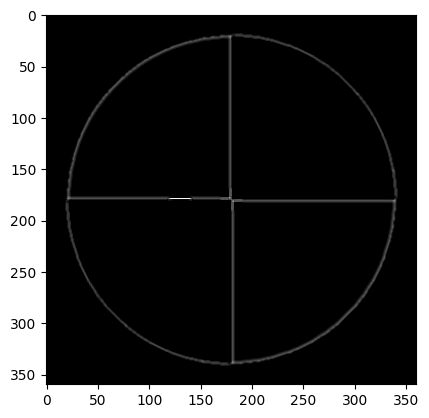

Variance mask : 


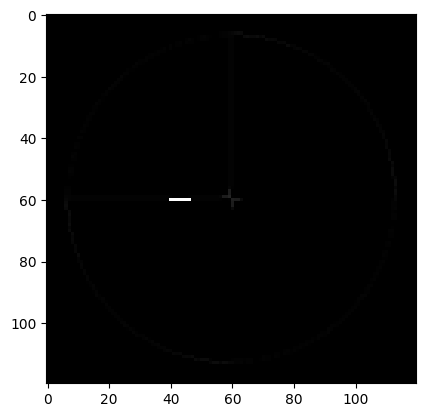

difference in variance maps


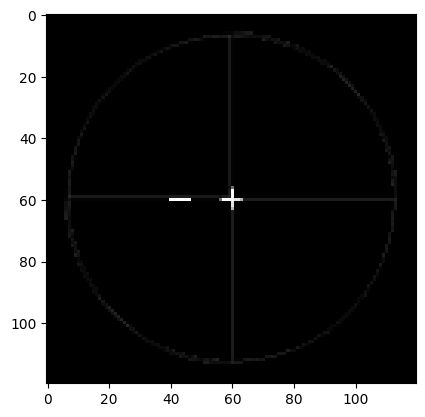

[[[ 60   6]]

 [[ 59   7]]

 [[ 51   7]]

 [[ 50   8]]

 [[ 46   8]]

 [[ 45   9]]

 [[ 43   9]]

 [[ 42  10]]

 [[ 40  10]]

 [[ 39  11]]

 [[ 37  11]]

 [[ 36  12]]

 [[ 35  12]]

 [[ 33  14]]

 [[ 32  14]]

 [[ 31  15]]

 [[ 30  15]]

 [[ 27  18]]

 [[ 26  18]]

 [[ 18  26]]

 [[ 18  27]]

 [[ 15  30]]

 [[ 15  31]]

 [[ 14  32]]

 [[ 14  33]]

 [[ 12  35]]

 [[ 12  36]]

 [[ 11  37]]

 [[ 11  39]]

 [[ 10  40]]

 [[ 10  42]]

 [[  9  43]]

 [[  9  45]]

 [[  8  46]]

 [[  8  50]]

 [[  7  51]]

 [[  7  59]]

 [[  6  60]]

 [[  6  66]]

 [[  7  67]]

 [[  7  72]]

 [[  8  73]]

 [[  8  75]]

 [[  9  76]]

 [[  9  78]]

 [[ 10  79]]

 [[ 10  81]]

 [[ 11  82]]

 [[ 11  83]]

 [[ 12  84]]

 [[ 12  85]]

 [[ 14  87]]

 [[ 14  88]]

 [[ 15  89]]

 [[ 15  90]]

 [[ 18  93]]

 [[ 18  94]]

 [[ 23  99]]

 [[ 24  99]]

 [[ 28 103]]

 [[ 29 103]]

 [[ 32 106]]

 [[ 33 106]]

 [[ 34 107]]

 [[ 35 107]]

 [[ 36 108]]

 [[ 37 108]]

 [[ 38 109]]

 [[ 39 109]]

 [[ 40 110]]

 [[ 42 110]]

 [[ 43

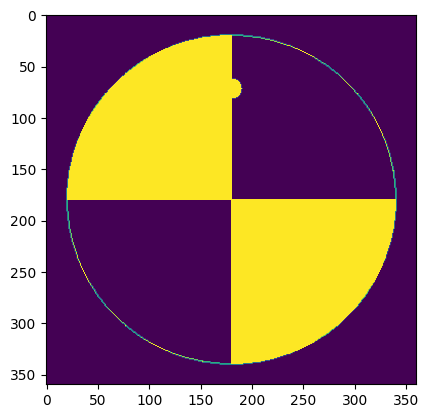

Predicted translation of focal point :  0 -108
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  246.07315985291854
Angle :  -0.7853981633974484
[[[ 60  61]]

 [[ 61  60]]

 [[112  60]]

 [[113  61]]

 [[113  63]]

 [[112  64]]

 [[112  70]]

 [[111  71]]

 [[111  74]]

 [[110  75]]

 [[110  77]]

 [[109  78]]

 [[109  80]]

 [[108  81]]

 [[108  82]]

 [[107  83]]

 [[107  84]]

 [[106  85]]

 [[106  86]]

 [[104  88]]

 [[104  89]]

 [[101  92]]

 [[101  93]]

 [[ 93 101]]

 [[ 92 101]]

 [[ 89 104]]

 [[ 88 104]]

 [[ 86 106]]

 [[ 85 106]]

 [[ 84 107]]

 [[ 83 107]]

 [[ 82 108]]

 [[ 81 108]]

 [[ 80 109]]

 [[ 78 109]]

 [[ 77 110]]

 [[ 75 110]]

 [[ 74 111]]

 [[ 71 111]]

 [[ 70 112]]

 [[ 64 112]]

 [[ 63 113]]

 [[ 61 113]]

 [[ 60 112]]]
(261, 207)  are the new centers 
predicted center of the new focal length is highlighed in red


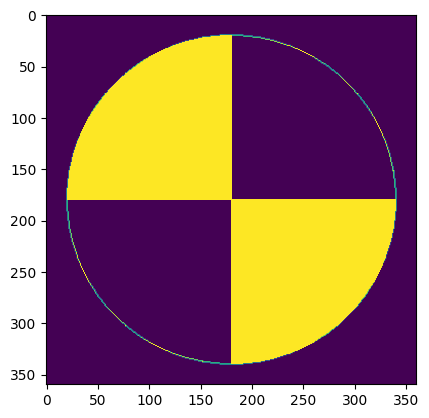

Predicted translation of focal point :  81 27
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  169.7056274847714
Angle :  -0.7853981633974482
[[[  7  60]]

 [[  8  59]]

 [[ 39  59]]

 [[ 40  60]]

 [[ 46  60]]

 [[ 47  59]]

 [[ 55  59]]

 [[ 56  60]]

 [[ 59  60]]

 [[ 60  61]]

 [[ 60 112]]

 [[ 59 113]]

 [[ 56 113]]

 [[ 55 112]]

 [[ 49 112]]

 [[ 48 111]]

 [[ 45 111]]

 [[ 44 110]]

 [[ 42 110]]

 [[ 41 109]]

 [[ 40 109]]

 [[ 39 108]]

 [[ 37 108]]

 [[ 36 107]]

 [[ 35 107]]

 [[ 34 106]]

 [[ 33 106]]

 [[ 32 105]]

 [[ 31 105]]

 [[ 26 100]]

 [[ 25 100]]

 [[ 17  92]]

 [[ 17  91]]

 [[ 16  90]]

 [[ 16  89]]

 [[ 14  87]]

 [[ 14  86]]

 [[ 13  85]]

 [[ 13  84]]

 [[ 12  83]]

 [[ 12  82]]

 [[ 11  81]]

 [[ 11  80]]

 [[ 10  79]]

 [[ 10  77]]

 [[  9  76]]

 [[  9  74]]

 [[  8  73]]

 [[  8  70]]

 [[  7  69]]]
(102, 204)  are the new centers 
predicted center of the new focal length is highlighed in red


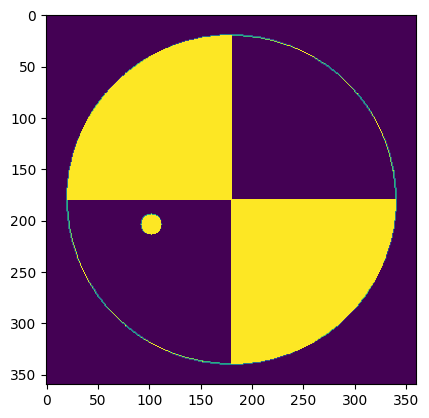

Predicted translation of focal point :  -78 24
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  211.11608181282637
Angle :  -0.6103379162907197
[[[ 59   8]]

 [[ 60   7]]

 [[ 69   7]]

 [[ 70   8]]

 [[ 73   8]]

 [[ 74   9]]

 [[ 76   9]]

 [[ 77  10]]

 [[ 79  10]]

 [[ 80  11]]

 [[ 81  11]]

 [[ 82  12]]

 [[ 83  12]]

 [[ 84  13]]

 [[ 85  13]]

 [[ 86  14]]

 [[ 87  14]]

 [[ 89  16]]

 [[ 90  16]]

 [[ 91  17]]

 [[ 92  17]]

 [[100  25]]

 [[100  26]]

 [[105  31]]

 [[105  32]]

 [[106  33]]

 [[106  34]]

 [[107  35]]

 [[107  36]]

 [[108  37]]

 [[108  39]]

 [[109  40]]

 [[109  41]]

 [[110  42]]

 [[110  44]]

 [[111  45]]

 [[111  48]]

 [[112  49]]

 [[112  55]]

 [[113  56]]

 [[113  59]]

 [[112  60]]

 [[ 61  60]]

 [[ 60  59]]

 [[ 60  56]]

 [[ 59  55]]]
(259, 48)  are the new centers 
predicted center of the new focal length is highlighed in red


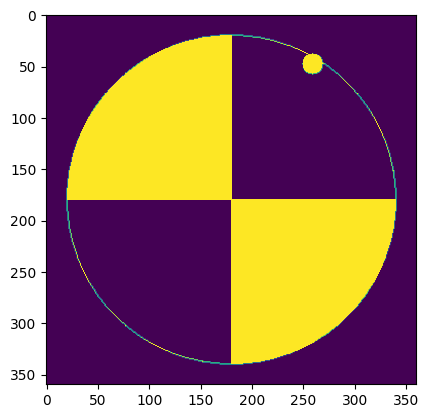

Predicted translation of focal point :  79 -132
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  211.11608181282637
Angle :  -0.9604584105041771
[[[50  8]]

 [[51  7]]

 [[58  7]]

 [[59  8]]

 [[59 58]]

 [[58 59]]

 [[ 8 59]]

 [[ 7 58]]

 [[ 7 51]]

 [[ 8 50]]

 [[ 8 46]]

 [[ 9 45]]

 [[ 9 43]]

 [[10 42]]

 [[10 41]]

 [[11 40]]

 [[11 38]]

 [[12 37]]

 [[12 36]]

 [[13 35]]

 [[13 34]]

 [[15 32]]

 [[15 31]]

 [[16 30]]

 [[16 29]]

 [[29 16]]

 [[30 16]]

 [[31 15]]

 [[32 15]]

 [[34 13]]

 [[35 13]]

 [[36 12]]

 [[37 12]]

 [[38 11]]

 [[40 11]]

 [[41 10]]

 [[42 10]]

 [[43  9]]

 [[45  9]]

 [[46  8]]]
(100, 47)  are the new centers 
predicted center of the new focal length is highlighed in red


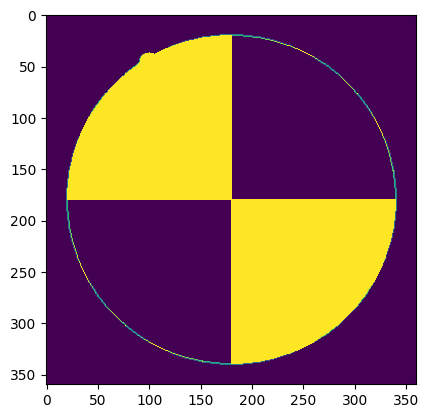

Predicted translation of focal point :  -80 -133
Actual translation :  -50
Correction parameters
Angle of rotation : 
Radius :  244.65894629054543
Angle :  -0.7853981633974484
Region with focal radius : 10




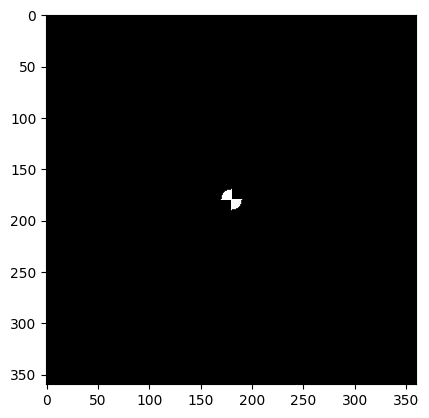

Test image with radius  10  being sharp with rest as blurred


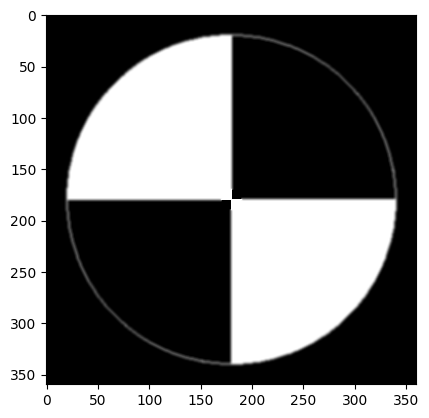

difference in test image and filtered non blurred region (in circular fasion)


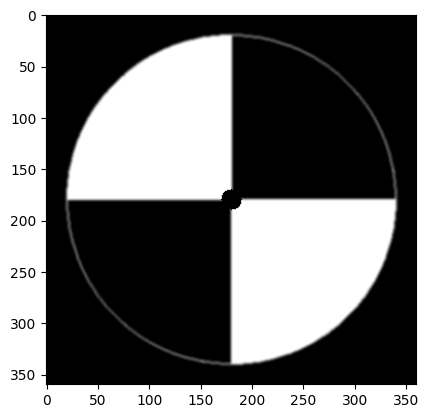

Visualization of separation of non blurred and blurred parts (radius = fr)


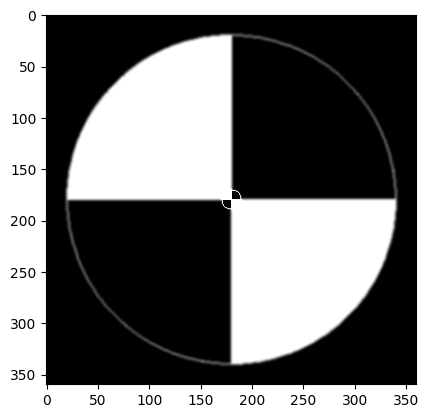

Laplacian Edge Mask


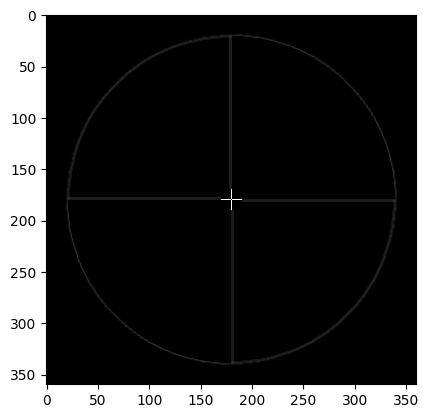

L O G edge mask


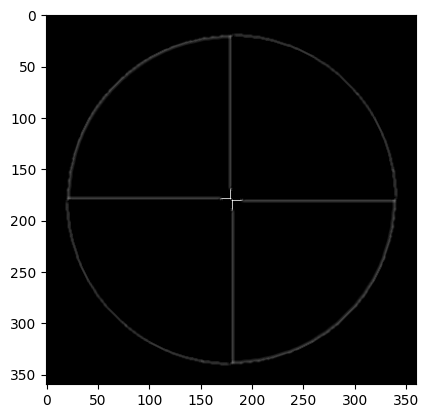

Variance mask : 


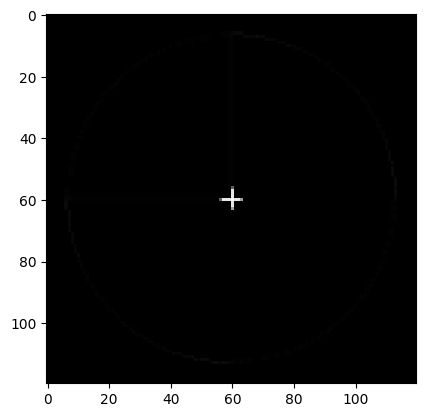

difference in variance maps


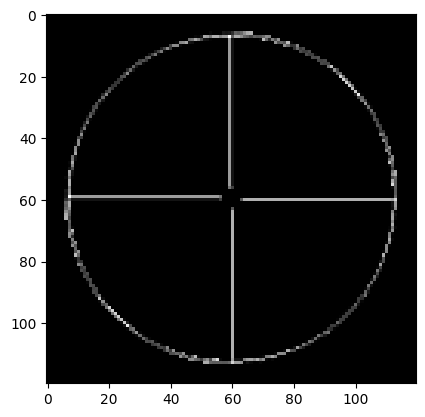

[[[ 60   6]]

 [[ 59   7]]

 [[ 51   7]]

 [[ 50   8]]

 [[ 46   8]]

 [[ 45   9]]

 [[ 43   9]]

 [[ 42  10]]

 [[ 40  10]]

 [[ 39  11]]

 [[ 37  11]]

 [[ 36  12]]

 [[ 35  12]]

 [[ 33  14]]

 [[ 32  14]]

 [[ 31  15]]

 [[ 30  15]]

 [[ 27  18]]

 [[ 26  18]]

 [[ 18  26]]

 [[ 18  27]]

 [[ 15  30]]

 [[ 15  31]]

 [[ 14  32]]

 [[ 14  33]]

 [[ 12  35]]

 [[ 12  36]]

 [[ 11  37]]

 [[ 11  39]]

 [[ 10  40]]

 [[ 10  42]]

 [[  9  43]]

 [[  9  45]]

 [[  8  46]]

 [[  8  50]]

 [[  7  51]]

 [[  7  59]]

 [[  6  60]]

 [[  6  66]]

 [[  7  67]]

 [[  7  72]]

 [[  8  73]]

 [[  8  75]]

 [[  9  76]]

 [[  9  78]]

 [[ 10  79]]

 [[ 10  81]]

 [[ 11  82]]

 [[ 11  83]]

 [[ 12  84]]

 [[ 12  85]]

 [[ 14  87]]

 [[ 14  88]]

 [[ 15  89]]

 [[ 15  90]]

 [[ 18  93]]

 [[ 18  94]]

 [[ 23  99]]

 [[ 24  99]]

 [[ 28 103]]

 [[ 29 103]]

 [[ 32 106]]

 [[ 33 106]]

 [[ 34 107]]

 [[ 35 107]]

 [[ 36 108]]

 [[ 37 108]]

 [[ 38 109]]

 [[ 39 109]]

 [[ 40 110]]

 [[ 42 110]]

 [[ 43

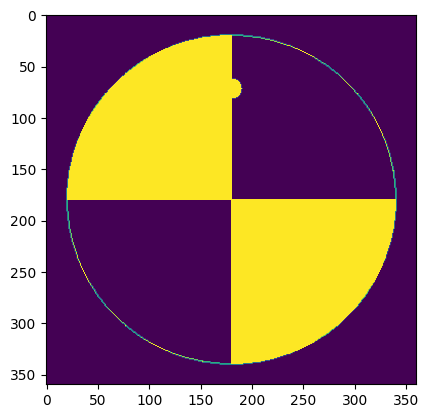

Predicted translation of focal point :  0 -108
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  246.07315985291854
Angle :  -0.7853981633974484
[[[ 50   8]]

 [[ 51   7]]

 [[ 58   7]]

 [[ 59   8]]

 [[ 59  56]]

 [[ 60  56]]

 [[ 59  55]]

 [[ 59   8]]

 [[ 60   7]]

 [[ 69   7]]

 [[ 70   8]]

 [[ 73   8]]

 [[ 74   9]]

 [[ 76   9]]

 [[ 77  10]]

 [[ 79  10]]

 [[ 80  11]]

 [[ 81  11]]

 [[ 82  12]]

 [[ 83  12]]

 [[ 84  13]]

 [[ 85  13]]

 [[ 86  14]]

 [[ 87  14]]

 [[ 89  16]]

 [[ 90  16]]

 [[ 91  17]]

 [[ 92  17]]

 [[100  25]]

 [[100  26]]

 [[105  31]]

 [[105  32]]

 [[106  33]]

 [[106  34]]

 [[107  35]]

 [[107  36]]

 [[108  37]]

 [[108  39]]

 [[109  40]]

 [[109  41]]

 [[110  42]]

 [[110  44]]

 [[111  45]]

 [[111  48]]

 [[112  49]]

 [[112  55]]

 [[113  56]]

 [[113  59]]

 [[112  60]]

 [[ 63  60]]

 [[112  60]]

 [[113  61]]

 [[113  63]]

 [[112  64]]

 [[112  70]]

 [[111  71]]

 [[111  74]]

 [[110  75]]

 [[110  77]]

 [

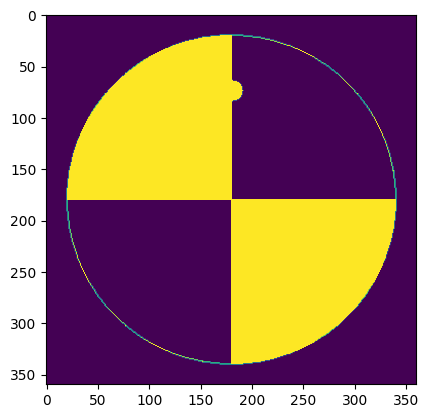

Predicted translation of focal point :  1 -106
Actual translation :  0
Correction parameters
Angle of rotation : 
Radius :  244.65894629054543
Angle :  -0.7853981633974484
Region with focal radius : 10




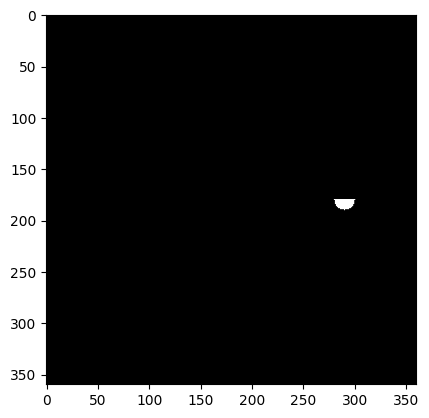

Test image with radius  10  being sharp with rest as blurred


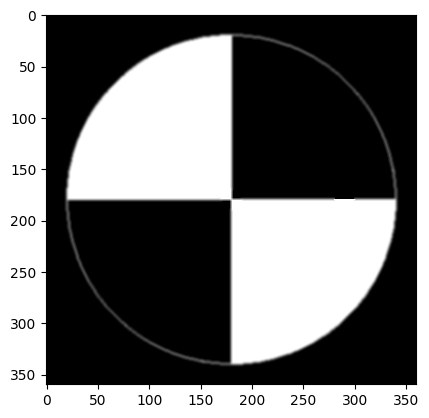

difference in test image and filtered non blurred region (in circular fasion)


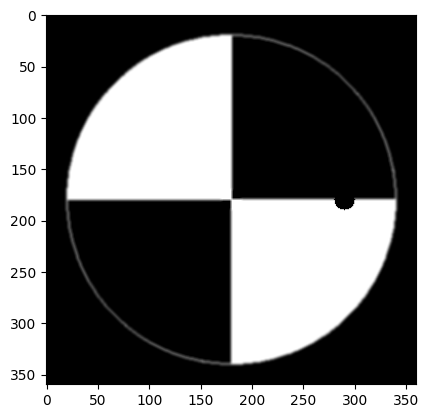

Visualization of separation of non blurred and blurred parts (radius = fr)


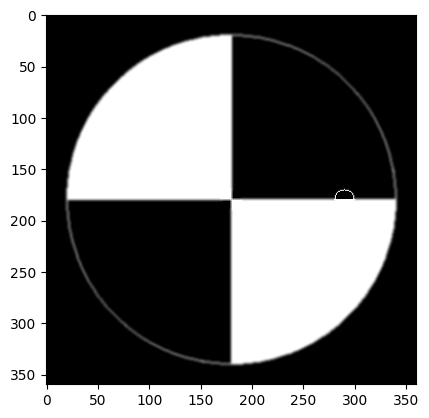

Laplacian Edge Mask


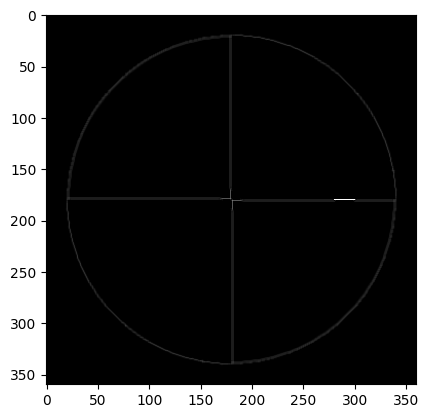

L O G edge mask


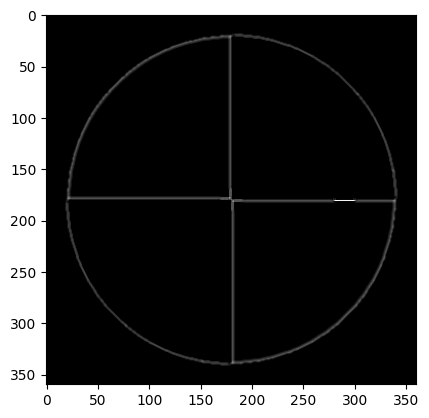

Variance mask : 


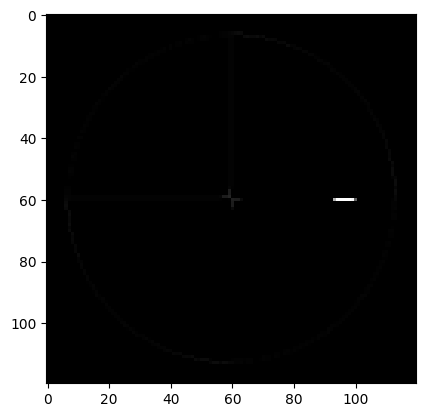

difference in variance maps


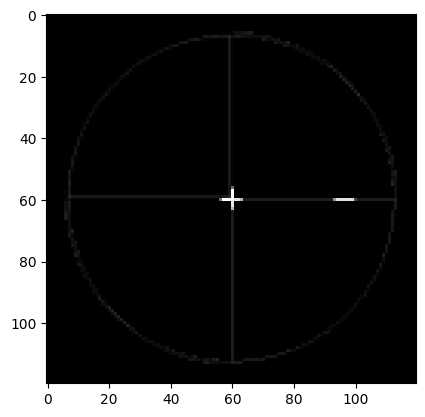

[[[ 60   6]]

 [[ 59   7]]

 [[ 51   7]]

 [[ 50   8]]

 [[ 46   8]]

 [[ 45   9]]

 [[ 43   9]]

 [[ 42  10]]

 [[ 40  10]]

 [[ 39  11]]

 [[ 37  11]]

 [[ 36  12]]

 [[ 35  12]]

 [[ 33  14]]

 [[ 32  14]]

 [[ 31  15]]

 [[ 30  15]]

 [[ 27  18]]

 [[ 26  18]]

 [[ 18  26]]

 [[ 18  27]]

 [[ 15  30]]

 [[ 15  31]]

 [[ 14  32]]

 [[ 14  33]]

 [[ 12  35]]

 [[ 12  36]]

 [[ 11  37]]

 [[ 11  39]]

 [[ 10  40]]

 [[ 10  42]]

 [[  9  43]]

 [[  9  45]]

 [[  8  46]]

 [[  8  50]]

 [[  7  51]]

 [[  7  59]]

 [[  6  60]]

 [[  6  66]]

 [[  7  67]]

 [[  7  72]]

 [[  8  73]]

 [[  8  75]]

 [[  9  76]]

 [[  9  78]]

 [[ 10  79]]

 [[ 10  81]]

 [[ 11  82]]

 [[ 11  83]]

 [[ 12  84]]

 [[ 12  85]]

 [[ 14  87]]

 [[ 14  88]]

 [[ 15  89]]

 [[ 15  90]]

 [[ 18  93]]

 [[ 18  94]]

 [[ 23  99]]

 [[ 24  99]]

 [[ 28 103]]

 [[ 29 103]]

 [[ 32 106]]

 [[ 33 106]]

 [[ 34 107]]

 [[ 35 107]]

 [[ 36 108]]

 [[ 37 108]]

 [[ 38 109]]

 [[ 39 109]]

 [[ 40 110]]

 [[ 42 110]]

 [[ 43

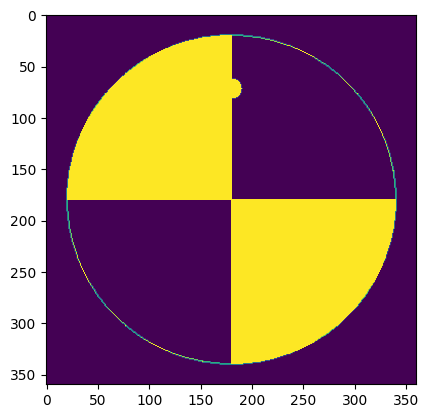

Predicted translation of focal point :  0 -108
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  246.07315985291854
Angle :  -0.7853981633974484
[[[ 60  61]]

 [[ 61  60]]

 [[112  60]]

 [[113  61]]

 [[113  63]]

 [[112  64]]

 [[112  70]]

 [[111  71]]

 [[111  74]]

 [[110  75]]

 [[110  77]]

 [[109  78]]

 [[109  80]]

 [[108  81]]

 [[108  82]]

 [[107  83]]

 [[107  84]]

 [[106  85]]

 [[106  86]]

 [[104  88]]

 [[104  89]]

 [[101  92]]

 [[101  93]]

 [[ 93 101]]

 [[ 92 101]]

 [[ 89 104]]

 [[ 88 104]]

 [[ 86 106]]

 [[ 85 106]]

 [[ 84 107]]

 [[ 83 107]]

 [[ 82 108]]

 [[ 81 108]]

 [[ 80 109]]

 [[ 78 109]]

 [[ 77 110]]

 [[ 75 110]]

 [[ 74 111]]

 [[ 71 111]]

 [[ 70 112]]

 [[ 64 112]]

 [[ 63 113]]

 [[ 61 113]]

 [[ 60 112]]]
(261, 207)  are the new centers 
predicted center of the new focal length is highlighed in red


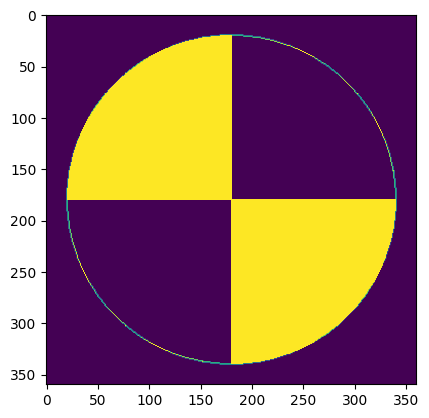

Predicted translation of focal point :  81 27
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  169.7056274847714
Angle :  -0.7853981633974482
[[[  7  60]]

 [[  8  59]]

 [[ 55  59]]

 [[ 56  60]]

 [[ 59  60]]

 [[ 60  61]]

 [[ 60 112]]

 [[ 59 113]]

 [[ 56 113]]

 [[ 55 112]]

 [[ 49 112]]

 [[ 48 111]]

 [[ 45 111]]

 [[ 44 110]]

 [[ 42 110]]

 [[ 41 109]]

 [[ 40 109]]

 [[ 39 108]]

 [[ 37 108]]

 [[ 36 107]]

 [[ 35 107]]

 [[ 34 106]]

 [[ 33 106]]

 [[ 32 105]]

 [[ 31 105]]

 [[ 26 100]]

 [[ 25 100]]

 [[ 17  92]]

 [[ 17  91]]

 [[ 16  90]]

 [[ 16  89]]

 [[ 14  87]]

 [[ 14  86]]

 [[ 13  85]]

 [[ 13  84]]

 [[ 12  83]]

 [[ 12  82]]

 [[ 11  81]]

 [[ 11  80]]

 [[ 10  79]]

 [[ 10  77]]

 [[  9  76]]

 [[  9  74]]

 [[  8  73]]

 [[  8  70]]

 [[  7  69]]]
(102, 204)  are the new centers 
predicted center of the new focal length is highlighed in red


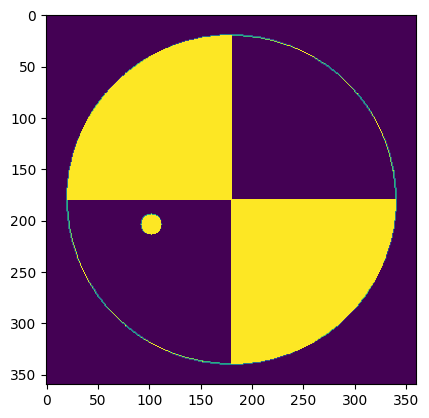

Predicted translation of focal point :  -78 24
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  211.11608181282637
Angle :  -0.6103379162907197
[[[ 59   8]]

 [[ 60   7]]

 [[ 69   7]]

 [[ 70   8]]

 [[ 73   8]]

 [[ 74   9]]

 [[ 76   9]]

 [[ 77  10]]

 [[ 79  10]]

 [[ 80  11]]

 [[ 81  11]]

 [[ 82  12]]

 [[ 83  12]]

 [[ 84  13]]

 [[ 85  13]]

 [[ 86  14]]

 [[ 87  14]]

 [[ 89  16]]

 [[ 90  16]]

 [[ 91  17]]

 [[ 92  17]]

 [[100  25]]

 [[100  26]]

 [[105  31]]

 [[105  32]]

 [[106  33]]

 [[106  34]]

 [[107  35]]

 [[107  36]]

 [[108  37]]

 [[108  39]]

 [[109  40]]

 [[109  41]]

 [[110  42]]

 [[110  44]]

 [[111  45]]

 [[111  48]]

 [[112  49]]

 [[112  55]]

 [[113  56]]

 [[113  59]]

 [[112  60]]

 [[ 61  60]]

 [[ 60  59]]

 [[ 60  56]]

 [[ 59  55]]]
(259, 48)  are the new centers 
predicted center of the new focal length is highlighed in red


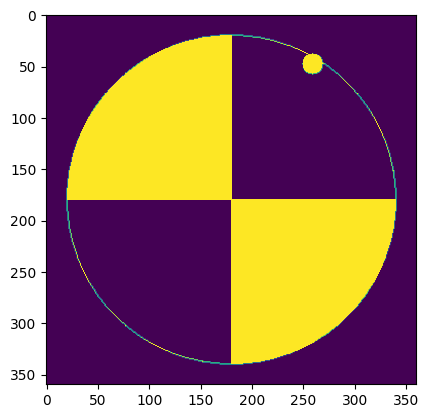

Predicted translation of focal point :  79 -132
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  211.11608181282637
Angle :  -0.9604584105041771
[[[50  8]]

 [[51  7]]

 [[58  7]]

 [[59  8]]

 [[59 58]]

 [[58 59]]

 [[ 8 59]]

 [[ 7 58]]

 [[ 7 51]]

 [[ 8 50]]

 [[ 8 46]]

 [[ 9 45]]

 [[ 9 43]]

 [[10 42]]

 [[10 41]]

 [[11 40]]

 [[11 38]]

 [[12 37]]

 [[12 36]]

 [[13 35]]

 [[13 34]]

 [[15 32]]

 [[15 31]]

 [[16 30]]

 [[16 29]]

 [[29 16]]

 [[30 16]]

 [[31 15]]

 [[32 15]]

 [[34 13]]

 [[35 13]]

 [[36 12]]

 [[37 12]]

 [[38 11]]

 [[40 11]]

 [[41 10]]

 [[42 10]]

 [[43  9]]

 [[45  9]]

 [[46  8]]]
(100, 47)  are the new centers 
predicted center of the new focal length is highlighed in red


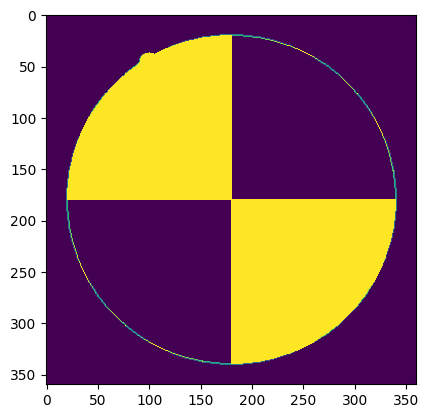

Predicted translation of focal point :  -80 -133
Actual translation :  110
Correction parameters
Angle of rotation : 
Radius :  244.65894629054543
Angle :  -0.7853981633974484
Region with focal radius : 10




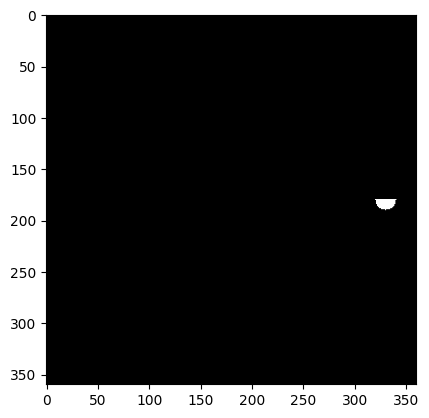

Test image with radius  10  being sharp with rest as blurred


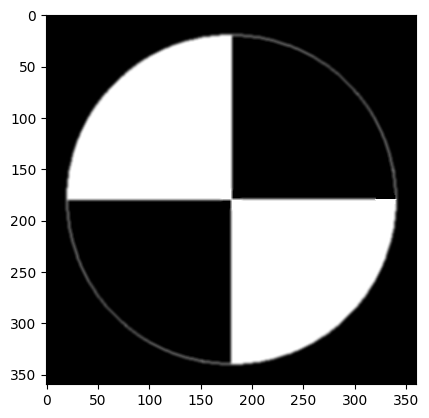

difference in test image and filtered non blurred region (in circular fasion)


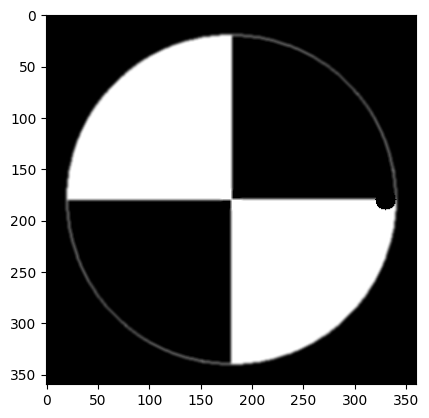

Visualization of separation of non blurred and blurred parts (radius = fr)


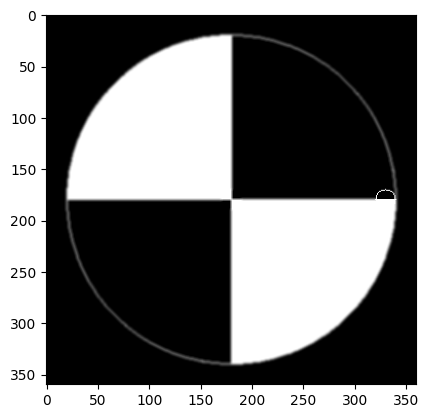

Laplacian Edge Mask


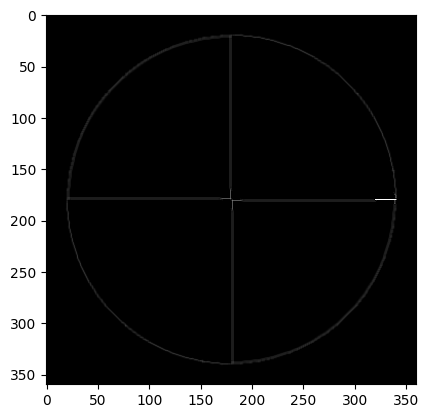

L O G edge mask


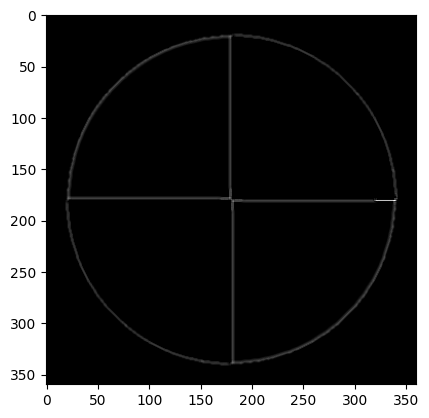

Variance mask : 


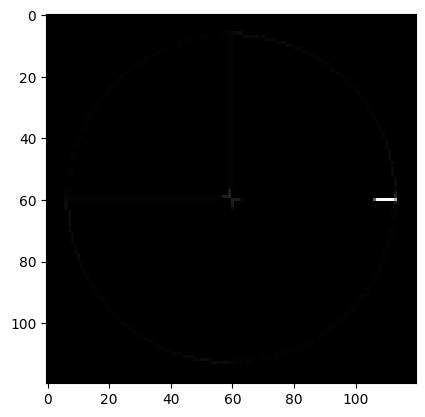

difference in variance maps


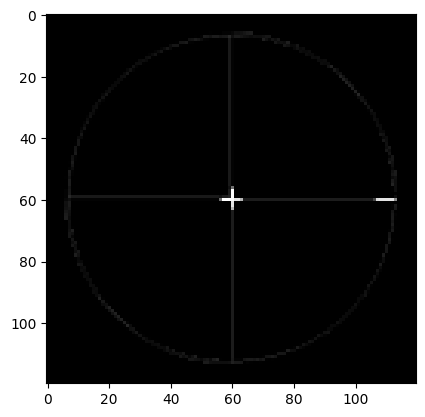

[[[ 60   6]]

 [[ 59   7]]

 [[ 51   7]]

 [[ 50   8]]

 [[ 46   8]]

 [[ 45   9]]

 [[ 43   9]]

 [[ 42  10]]

 [[ 40  10]]

 [[ 39  11]]

 [[ 37  11]]

 [[ 36  12]]

 [[ 35  12]]

 [[ 33  14]]

 [[ 32  14]]

 [[ 31  15]]

 [[ 30  15]]

 [[ 27  18]]

 [[ 26  18]]

 [[ 18  26]]

 [[ 18  27]]

 [[ 15  30]]

 [[ 15  31]]

 [[ 14  32]]

 [[ 14  33]]

 [[ 12  35]]

 [[ 12  36]]

 [[ 11  37]]

 [[ 11  39]]

 [[ 10  40]]

 [[ 10  42]]

 [[  9  43]]

 [[  9  45]]

 [[  8  46]]

 [[  8  50]]

 [[  7  51]]

 [[  7  59]]

 [[  6  60]]

 [[  6  66]]

 [[  7  67]]

 [[  7  72]]

 [[  8  73]]

 [[  8  75]]

 [[  9  76]]

 [[  9  78]]

 [[ 10  79]]

 [[ 10  81]]

 [[ 11  82]]

 [[ 11  83]]

 [[ 12  84]]

 [[ 12  85]]

 [[ 14  87]]

 [[ 14  88]]

 [[ 15  89]]

 [[ 15  90]]

 [[ 18  93]]

 [[ 18  94]]

 [[ 23  99]]

 [[ 24  99]]

 [[ 28 103]]

 [[ 29 103]]

 [[ 32 106]]

 [[ 33 106]]

 [[ 34 107]]

 [[ 35 107]]

 [[ 36 108]]

 [[ 37 108]]

 [[ 38 109]]

 [[ 39 109]]

 [[ 40 110]]

 [[ 42 110]]

 [[ 43

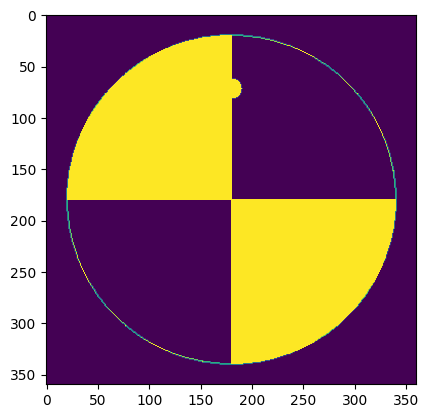

Predicted translation of focal point :  0 -108
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  246.07315985291854
Angle :  -0.7853981633974484
[[[  7  60]]

 [[  8  59]]

 [[ 55  59]]

 [[ 56  60]]

 [[ 59  60]]

 [[ 60  61]]

 [[ 60 112]]

 [[ 59 113]]

 [[ 56 113]]

 [[ 55 112]]

 [[ 49 112]]

 [[ 48 111]]

 [[ 45 111]]

 [[ 44 110]]

 [[ 42 110]]

 [[ 41 109]]

 [[ 40 109]]

 [[ 39 108]]

 [[ 37 108]]

 [[ 36 107]]

 [[ 35 107]]

 [[ 34 106]]

 [[ 33 106]]

 [[ 32 105]]

 [[ 31 105]]

 [[ 26 100]]

 [[ 25 100]]

 [[ 17  92]]

 [[ 17  91]]

 [[ 16  90]]

 [[ 16  89]]

 [[ 14  87]]

 [[ 14  86]]

 [[ 13  85]]

 [[ 13  84]]

 [[ 12  83]]

 [[ 12  82]]

 [[ 11  81]]

 [[ 11  80]]

 [[ 10  79]]

 [[ 10  77]]

 [[  9  76]]

 [[  9  74]]

 [[  8  73]]

 [[  8  70]]

 [[  7  69]]]
(102, 204)  are the new centers 
predicted center of the new focal length is highlighed in red


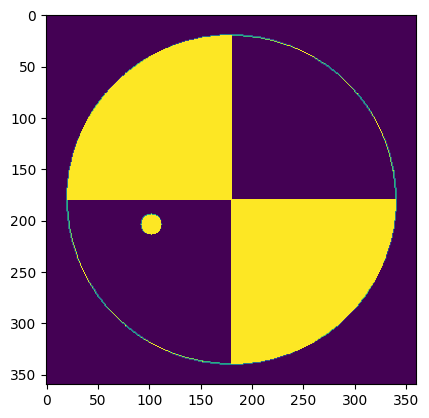

Predicted translation of focal point :  -78 24
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  211.11608181282637
Angle :  -0.6103379162907197
[[[50  8]]

 [[51  7]]

 [[58  7]]

 [[59  8]]

 [[59 58]]

 [[58 59]]

 [[ 8 59]]

 [[ 7 58]]

 [[ 7 51]]

 [[ 8 50]]

 [[ 8 46]]

 [[ 9 45]]

 [[ 9 43]]

 [[10 42]]

 [[10 41]]

 [[11 40]]

 [[11 38]]

 [[12 37]]

 [[12 36]]

 [[13 35]]

 [[13 34]]

 [[15 32]]

 [[15 31]]

 [[16 30]]

 [[16 29]]

 [[29 16]]

 [[30 16]]

 [[31 15]]

 [[32 15]]

 [[34 13]]

 [[35 13]]

 [[36 12]]

 [[37 12]]

 [[38 11]]

 [[40 11]]

 [[41 10]]

 [[42 10]]

 [[43  9]]

 [[45  9]]

 [[46  8]]]
(100, 47)  are the new centers 
predicted center of the new focal length is highlighed in red


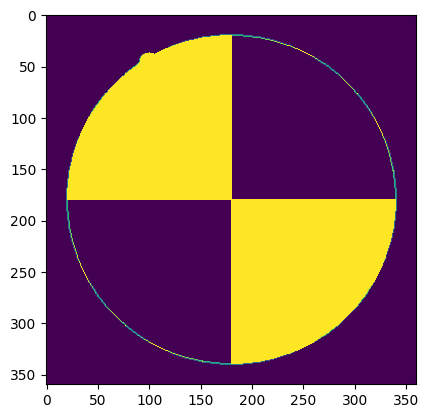

Predicted translation of focal point :  -80 -133
Actual translation :  150
Correction parameters
Angle of rotation : 
Radius :  244.65894629054543
Angle :  -0.7853981633974484
------------------------------------------------------














In [5]:
focal_radiis = 10
translations = [-150,-50,0,110,150]
for t  in translations:
    center = (CENTER[0]+t,CENTER[1])
    fr = 10
    blurred_image = cv2.GaussianBlur(image, (3, 3), 10)
    mask = np.zeros(IMG_DIMS, dtype=np.uint8)
    non_blurred_region = cv2.circle(mask, center, 10, (255, 255, 255), -1)
    non_blurred_region = cv2.bitwise_and(non_blurred_region, original_image)
    print('Region with focal radius : ' + str(fr) + '\n\n')
    plt.imshow(non_blurred_region, cmap='gray')
    plt.show()

    blurred_image_copy = blurred_image.copy()
    blurred_image_copy = cv2.circle(blurred_image_copy, center, fr, (0, 0, 0), -1)
    test_image = blurred_image_copy +  non_blurred_region
            
    print('Test image with radius ', fr, ' being sharp with rest as blurred')
    plt.imshow(test_image, cmap='gray')
    plt.show()
    print('difference in test image and filtered non blurred region (in circular fasion)')
    plt.imshow(test_image - non_blurred_region, cmap='gray')
    plt.show()
    print('Visualization of separation of non blurred and blurred parts (radius = fr)')
    test_image_copy = test_image.copy()
    plt.imshow(cv2.circle(test_image_copy, center, fr, (255, 0, 0), 1), cmap='gray')
    plt.show()

    laplacian_filter_8 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_8)
    
    print('Laplacian Edge Mask')
    plt.imshow(edge_mask, cmap='gray')
    plt.show()
    gaussian_image = cv2.GaussianBlur(test_image, (3, 3), 3)
    g_edge_mask = cv2.filter2D(gaussian_image, -1, laplacian_filter_8)
    print('L O G edge mask')
    plt.imshow(g_edge_mask, cmap='gray')
    plt.show()

    edge_map = g_edge_mask

    test_image_variances = []
    for x in range(0, IMG_DIMS[0]//3):
        for y in range(0, IMG_DIMS[1]//3):
            i = x * 3
            j = y * 3
            test_image_variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
            edge_mask[i+1,j+2]
            ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

    test_image_variances = np.array(test_image_variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)

    print('Variance mask : ')
    plt.imshow(test_image_variances, cmap='gray')
    plt.show()

    print('difference in variance maps')
    plt.imshow((abs(test_image_variances - variance_image)), cmap='gray')
    plt.show()


    # find contours
    absolute_diff_variance_map = abs(test_image_variances - variance_image)
    countours, b  = cv2.findContours(cv2.threshold(absolute_diff_variance_map, 150, 255, cv2.THRESH_BINARY)[1].astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in    countours:
        print(c)
        # Find the center of all contours.
        #M = cv2.moments(c)
        #if (M["m00"] == 0):
        #     continue 
        #cX = int(M["m10"] / M["m00"])
        #cY = int(M["m01"] / M["m00"])

        x,y,w,h = cv2.boundingRect(c)

        
        focal_point_position = ((int)((x  + w/2) * 3), (int)((y + h/6) * 3)) 
        print(focal_point_position, ' are the new centers ')

        img = original_image.copy()

        print('predicted center of the new focal length is highlighed in red')
        plt.imshow(cv2.circle(img, focal_point_position, 10, (255, 0, 0), -1))
        plt.show()

        print('Predicted translation of focal point : ', focal_point_position[0] -  CENTER[0], focal_point_position[1] - CENTER[1])
        print('Actual translation : ', t)
        #print(variances)

        print("Correction parameters")

        print('Angle of rotation : ')
        _x = x - CENTER[0]
        _y = y - CENTER[1]
        r = np.sqrt(_x*_x + _y*_y)
        print('Radius : ', r)
        sin_theta = (_y) / r
        angle = np.arcsin(sin_theta)
        print('Angle : ', angle)



print('------------------------------------------------------\n\n\n\n\n\n\n\n\n\n\n\n')

#print(original_variances)